# Running simulations in parallel

In this tutorial we show how the number of threads can be specified when simulations are executed in parallel. We start by defining a simple system object.

In [1]:
import discretisedfield as df
import micromagneticmodel as mm

import oommfc as mc

region = df.Region(p1=(-50e-9, -50e-9, 0), p2=(50e-9, 50e-9, 10e-9))
mesh = df.Mesh(region=region, cell=(5e-9, 5e-9, 5e-9))

system = mm.System(name="mindriver_steps")

system.energy = mm.Exchange(A=1e-12) + mm.Zeeman(H=(0, 0, 1e5)) + mm.Demag()
system.dynamics = mm.Precession(gamma0=mm.consts.gamma0) + mm.Damping(alpha=0.5)
system.m = df.Field(mesh, nvdim=3, value=(1, 0, 0), norm=1.1e6)

We are now going to drive the system using `TimeDriver` for $2\,\text{ns}$ and save the magnetisation in 200 steps. When we pass those arguments to the `drive` method, we can also specify `n_threads`. `n_threads` is a positive `int` which specifies how many threads are going to be used in simulation.

In [2]:
td = mc.TimeDriver()
td.drive(system, t=2e-9, n=200, n_threads=4)

Running OOMMF (ExeOOMMFRunner)[2025-02-02T14:32:22]... (1.3 s)


We can finally plot the magnetisation.

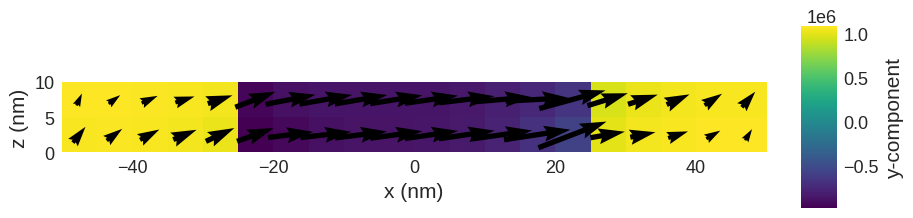

In [3]:
system.m.sel("y").mpl(figsize=(10, 3))